<a href="https://colab.research.google.com/github/maryamshahani/PlottingGraph/blob/main/PlottingGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WHICH PROGRAMMING LANGUAGE SHOULD I LEARN?

In [40]:
pip install pytrends

In [41]:
from pytrends.request import TrendReq

In [42]:
#make a pytrends object to request Google Trends data
pytrends = TrendReq(hl='en-US') 

#extract data about keywords
keywords = ['python', 'R', 'java' , 'c++' , 'HTML']
pytrends.build_payload(keywords, timeframe='today 5-y')

#specify and get data
data = pytrends.interest_over_time()
data

,python,R,java,c++,HTML,isPartial
date,,,,,,
2016-12-18,18,75,34,80,18,False
2016-12-25,14,60,29,74,13,False
2017-01-01,17,57,32,77,16,False
2017-01-08,19,57,35,83,18,False
2017-01-15,19,59,36,84,20,False
...,...,...,...,...,...,...
2021-11-07,24,44,19,82,10,False
2021-11-14,25,45,19,82,10,False
2021-11-21,23,43,18,77,10,False


In [43]:
type(data)

pandas.core.frame.DataFrame

In [44]:
pip install matplotlib

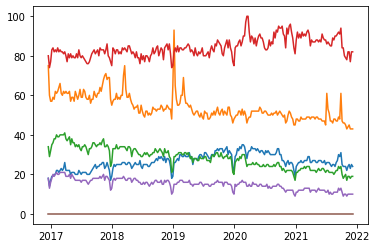

In [45]:
#plot data
import matplotlib.pyplot as plt


plt.plot(data)
plt.show()

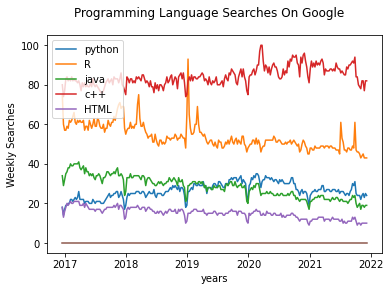

<Figure size 432x288 with 0 Axes>

In [46]:
#changes to make our graph more informative

plt.plot(data)

#add title
plt.suptitle('Programming Language Searches On Google')
plt.xlabel('years')  
plt.ylabel('Weekly Searches')

#add legend
plt.legend(keywords , loc='upper left')
plt.show()

#we can save it to the directory with Jupiter Notebook
plt.savefig('data.png')

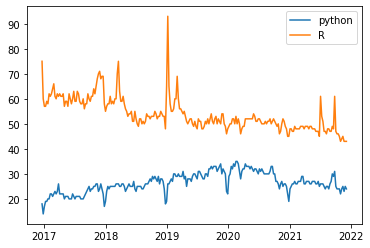

In [47]:
#analyse data
focus = ['python', 'R']
plt.plot(data[focus])

#add legend
plt.legend(focus) #default loc='upper right'

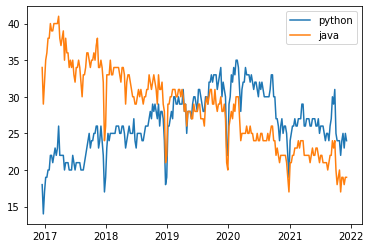

In [48]:
#analyse data
focus = ['python', 'java']
plt.plot(data[focus])

#add legend
plt.legend(focus)


# WHAT ARE THE TOP COUNTRIES SEARCHING FOR PYTHON?

In [49]:
#extract country-level kewords search data
country_data = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)

#get countries with the highest searches of "Python"
country_data = country_data['python'].nlargest(15)
country_data

geoName
China          49
Eritrea        41
Israel         37
St. Helena     29
Singapore      27
South Korea    26
Iceland        23
Russia         23
Taiwan         23
Hong Kong      22
Norway         21
Estonia        20
Macao          19
Cuba           18
Iran           18
Name: python, dtype: int64

In [50]:
type(country_data)

pandas.core.series.Series

In [51]:
#convert pndas series to dataframe and then we can plot it
country_data = country_data.to_frame()
country_data

,python
geoName,
China,49
Eritrea,41
Israel,37
St. Helena,29
Singapore,27
South Korea,26
Iceland,23
Russia,23
Taiwan,23


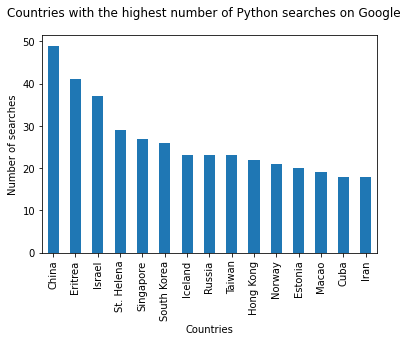

In [52]:
#plot a bar chart with pandas
country_data.plot(kind='bar', legend=None)

#titles
plt.suptitle('Countries with the highest number of Python searches on Google')
plt.ylabel('Number of searches')
plt.xlabel('Countries')

plt.show()

# PLOTTING RESULTS FOR MULTIPLE COUNTRIES

In [53]:
multi_country_data = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)
multi_country_data = multi_country_data[15:20] #five random country
multi_country_data


,python,R,java,c++,HTML
geoName,,,,,
Bahamas,6,34,5,51,4
Bahrain,8,28,10,45,9
Bangladesh,7,20,32,31,10
Barbados,7,35,7,46,5
Belarus,16,12,28,30,14


In [54]:
type(multi_country_data)

pandas.core.frame.DataFrame

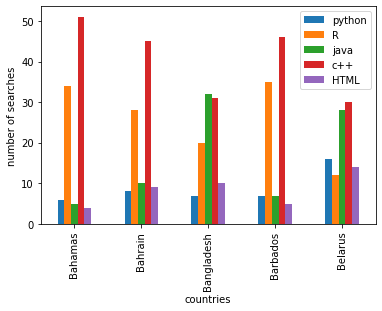

In [55]:
#plot bar chart
multi_country_data.plot(kind='bar')

plt.ylabel('number of searches')
plt.xlabel('countries')

plt.show()